In [233]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random

#### Question 2

Text(0.5, 1.0, 'Vector Field for the Consumer Resource Model (2a)')

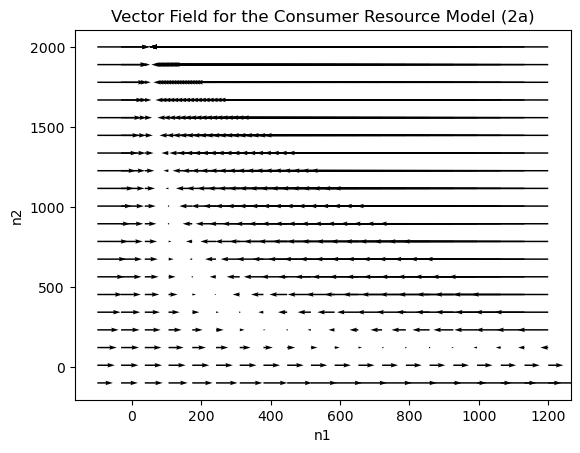

In [234]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.meshgrid(np.linspace(-100, 1200, 20), np.linspace(-100, 2000, 20))

a = 1000 - 0.01 * x * y
b = 0.000005 * x * y - 0.001 * y

plt.quiver(x, y, a, b, angles='xy', scale_units='xy', color='black', scale=20, headlength=5)
plt.xlabel('n1')
plt.ylabel('n2')
plt.title('Vector Field for the Consumer Resource Model (2a)')

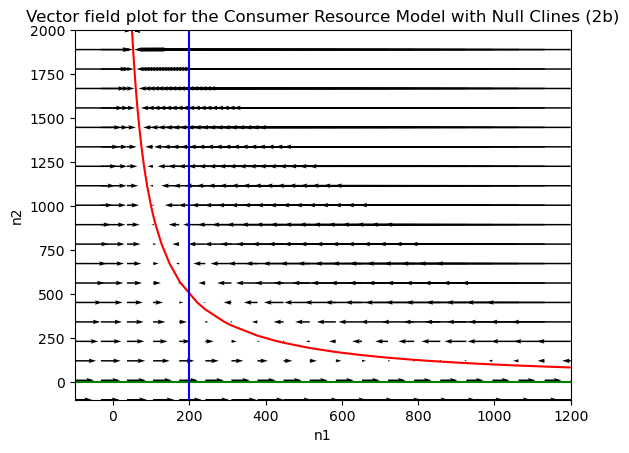

In [235]:
x, y = np.meshgrid(np.linspace(-100, 1200, 20), np.linspace(-100, 2000, 20))

a = 1000 - 0.01 * x * y
b = 0.000005 * x * y - 0.001 * y

plt.quiver(x, y, a, b, angles='xy', scale_units='xy', color='black', scale=20, headlength=5)
plt.contour(x, y, 100000 - x * y, colors='red', levels=[0]) 
plt.contour(x, y, y, colors='green', levels=[0])  
plt.contour(x, y, x - 200, colors='blue', levels=[0])
plt.xlabel('n1')
plt.ylabel('n2')
plt.title('Vector field plot for the Consumer Resource Model with Null Clines (2b)')
plt.show()


#### Question 4

In [236]:
def not_fighting_back(lambda1, lambda2, N, m, t):
    num_trials = 0
    num_everyone_infected_trials = 0 
    for i in range(t):
        I = m
        S = N-m
        R = 0
        time = 0
        while I > 0:
            infection_rate = lambda1 * I * (S / N)
            death_rate = lambda2 * I
            waiting_time_infection = np.random.exponential(1/(infection_rate+0.00000001))
            waiting_time_death = np.random.exponential(1/death_rate)

            # waiting_time_infection = np.random.exponential(infection_rate)
            # waiting_time_death = np.random.exponential(death_rate)
            
            if waiting_time_death < waiting_time_infection:
                event = "Death"
                I -= 1
                R += 1
            else:
                event = "Infection"
                S -= 1
                I += 1
        num_trials += 1
        if R == N:
            num_everyone_infected_trials += 1

    return num_everyone_infected_trials/num_trials
       

In [237]:
def fighting_back(lambda1, lambda2, lambda3, N, m, t):
    num_trials = 0
    num_everyone_infected_trials = 0 
    
    for i in range(t): 
        I = m
        S = N-m
        R = 0
        t = 0
    
        while I > 0:
            infection_rate = lambda1 * I * (S / N)
            killing_rate = (lambda3*I*S)/(S+I+R)
            death_rate = (lambda2 * I) + killing_rate
            waiting_time_infection = np.random.exponential(1/(infection_rate+0.00000001))
            waiting_time_death = np.random.exponential(1/death_rate)
            # waiting_time_infection = np.random.exponential(infection_rate)
            # waiting_time_death = np.random.exponential(death_rate)


            if waiting_time_death < waiting_time_infection:
                event = "Death"
                I -= 1
                R += 1       
            else:
                event = "Infection"
                I += 1
                S -= 1
                 
        num_trials += 1
        if R == N:
            num_everyone_infected_trials += 1      
    
    return num_everyone_infected_trials/num_trials
        

In [238]:
def varying_lambda2(lambda1, lambda3, N, m, t):
    simulate_SIR = []
    simulate_SIR_killing_rate = []
    lambda2_values = [0.001, 0.01, 0.1, 1, 10, 100]
    for i in lambda2_values:
        lambda2 = i
        f = fighting_back(lambda1, lambda2, lambda3, N, m, t)
        simulate_SIR_killing_rate.append(f)
        nf = not_fighting_back(lambda1, lambda2, N, m, t)
        simulate_SIR.append(nf)
    return simulate_SIR, simulate_SIR_killing_rate
        

In [239]:
def plot(l1, l2):
    # lambad2_vals = list(dictionary1.keys())
    lambda2_values = list(range(-3,3))

    plt.figure(figsize=(10, 6))
    plt.plot(lambda2_values, l1, label= 'SIR with no killing rate')
    plt.plot(lambda2_values, l2, label= 'SIR with a killing rate (lambda3')
    plt.xlabel('log Lambda 2 value')
    plt.ylabel('Fraction of trials with everyone infected')
    plt.legend()
    plt.title("Infected trials with varying lambda 2 value for both assumptions: Fighting Back and Not Fighting Back")
    plt.show()

Simulate SIR: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
Simulate SIR with killing rate (lambda 3) [1.0, 1.0, 0.0, 0.0, 0.0, 0.0]


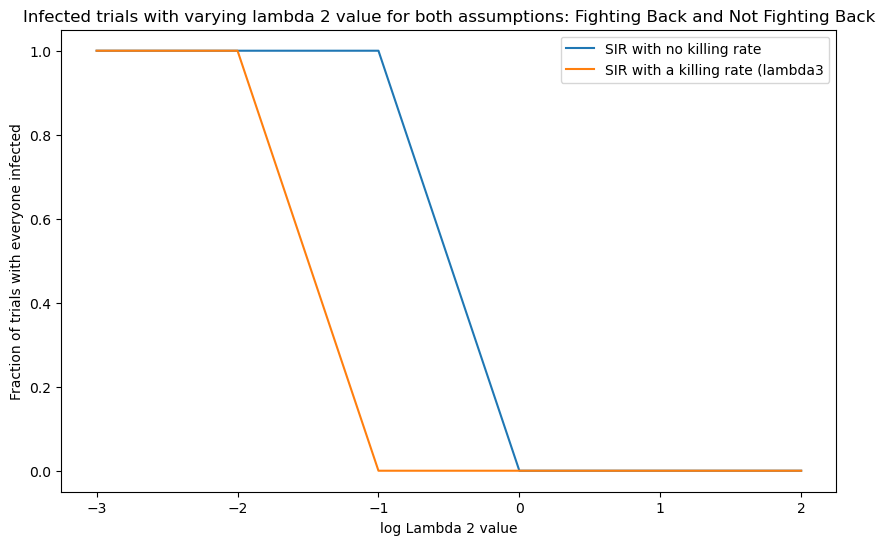

In [240]:
def main1():
    N = 10000
    m = 100
    lambda1 = 1.5
    lambda3 = 1
    t = 100
    fight, no_fight = varying_lambda2(lambda1, lambda3, N, m, t)
    print('Simulate SIR:', fight)
    print('Simulate SIR with killing rate (lambda 3)', no_fight)
    plot(fight, no_fight)

if __name__ == "__main__":
    main1()

#### Question 5

In [241]:
def simulate_stochastic(r_s, K, ini_pop):
    stochastic_model = dict()
    stochastic_model[0] = ini_pop

    for t in range(K):
        lambda_t = (1 + r_s * (1 - stochastic_model[t] / K)) * stochastic_model[t]
        if lambda_t < 0:
            lambda_t = 0  
        stochastic_model[t + 1] = np.random.poisson(lambda_t)
    return stochastic_model


In [242]:
def plot_stochastic(dictionary, r_val):
    generations = list(dictionary.keys())
    population_sizes = list(dictionary.values())
    plt.figure(figsize=(10, 6))
    plt.plot(generations, population_sizes, label='Trajectory of a stochastic model using r =' f'{r_val}')
    plt.xlabel('Generations')
    plt.ylabel('Population Size')
    plt.legend()
    plt.title('Stochastic Logistic Growth Model using r =' f'{r_val}')
    plt.grid(True)
    plt.show()

In [243]:
def deterministic_model(r_d, K, ini_pop):
    deterministic_model = dict()
    deterministic_model[0] = ini_pop
    for t in range(K):
        new_pop = deterministic_model[t]+ (r_d*deterministic_model[t]*(1-deterministic_model[t]/K))
        deterministic_model[t + 1] = new_pop
    return deterministic_model


In [244]:
def plot_stochastic_deterministc(s_dictionary, d_dictionary, sto_r_val, det_r_val):
    sto_generations = list(s_dictionary.keys())
    sto_population_sizes = list(s_dictionary.values())

    det_generations = list(d_dictionary.keys())
    det_population_sizes = list(d_dictionary.values())

    plt.figure(figsize=(10, 6))
    plt.plot(sto_generations, sto_population_sizes, label='Stochastic simulation')
    plt.plot(det_generations, det_population_sizes, label= 'Deterministic simulation')
    plt.xlabel('Generations')
    plt.ylabel('Population Size')
    plt.legend()
    plt.title(f"Comparison of Stochastic Model using r = {sto_r_val} and Deterministic Model using r = {det_r_val}")
    plt.show()

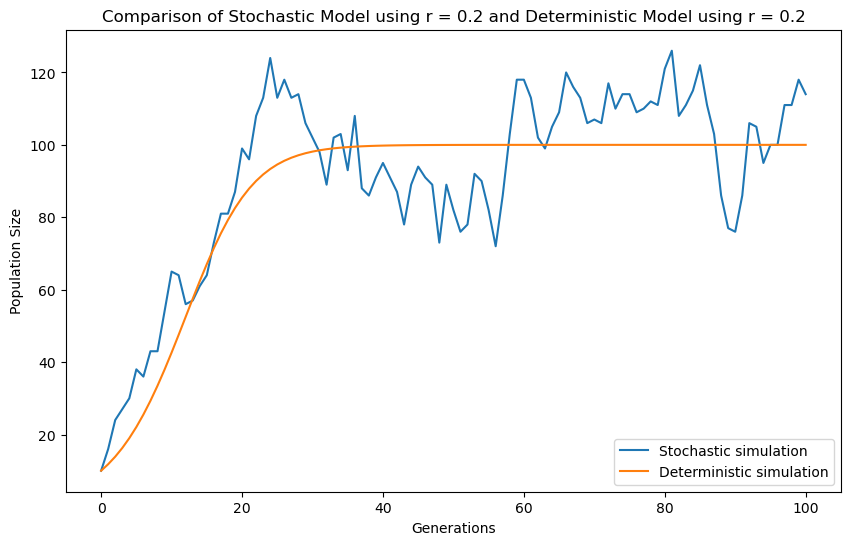

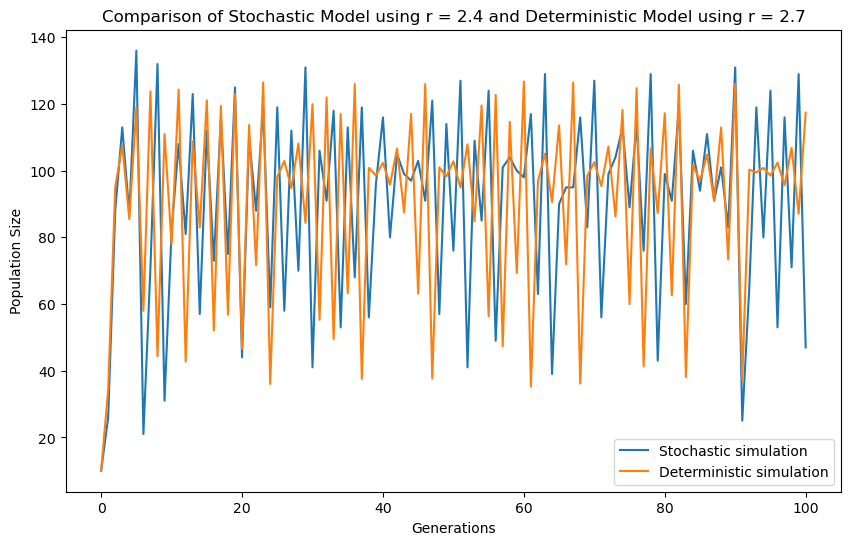

In [245]:
def main2():
    # Question 5
    r1 = 0.2  
    K = 100  
    initial_population = 10  
    sto_model = simulate_stochastic(r1, K, initial_population)
    det_model = deterministic_model(r1, K, initial_population)
    plot_stochastic_deterministc(sto_model, det_model, r1, r1)
    
    r_stochastic = 2.4 
    sto_model1 = simulate_stochastic(r_stochastic, K, initial_population)
    r_deterministic = 2.7
    det_model1 = deterministic_model(r_deterministic, K, initial_population)
    plot_stochastic_deterministc(sto_model1, det_model1, r_stochastic, r_deterministic)

    # Question 4
    
if __name__ == "__main__":
    main2()